In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive
%cd MyDrive
%cd 'Data Science Group Project - Big Data Course'

c = pd.read_csv('completed_matches.csv').drop('Unnamed: 0', axis=1) # completed_matches
u = pd.read_csv('upcoming_matches.csv').drop('Unnamed: 0', axis=1) # upcoming matches
p = pd.read_csv('players.csv').drop('Unnamed: 0', axis=1) # players


Mounted at /content/drive
/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Data Science Group Project - Big Data Course


In [3]:
c.head()
c.columns
p.columns

Index(['player_url', 'player_name', 'wins', 'losses', 'ties', 'nc',
       'total_matches', 'height', 'weight', 'reach', 'stance', 'age', 'ss',
       'ss_acc', 'ss_abs', 'ss_def', 'td', 'td_acc', 'td_def', 'sub', 'prev',
       'weight_class'],
      dtype='object')

In [4]:
# u = u.loc[:, ~ u.columns.str.contains('url')]
# u.head()

c.head()

,player_1_name,player_2_name,weight_class,win,duration,kd,o_kd,ss_hit,ss_att,o_ss_hit,...,age_diff,ss_diff,ss_acc_diff,ss_abs_diff,ss_def_diff,td_diff,td_acc_diff,td_def_diff,sub_diff,prev_diff
0,Tony Ferguson,Justin Gaethje,Lightweight,0,25,0,0,136,296,143,...,4.0,-2.39,-0.15,-3.90,0.03,0.44,0.41,-0.09,1.0,-1
1,Francis Ngannou,Jairzinho Rozenstruik,Heavyweight,1,15,1,0,6,13,5,...,2.0,-0.47,-0.04,-1.08,-0.04,0.76,0.62,-0.04,0.3,2
2,Anthony Pettis,Donald Cerrone,Lightweight,1,15,0,0,63,113,62,...,4.0,1.36,-0.01,1.04,-0.01,0.55,-0.17,0.13,0.1,-2
3,Carla Esparza,Michelle Waterson-Gomez,Strawweight,1,15,0,0,45,103,44,...,-1.0,-1.44,-0.08,-1.40,0.05,1.79,0.02,-0.20,-0.5,1
4,Vicente Luque,Niko Price,Welterweight,1,15,1,0,130,237,129,...,2.0,-0.01,-0.10,0.06,-0.04,0.19,-0.30,0.03,-0.1,0


In [ ]:
def clean_c(df):

  print('Data cleaning. Starting shape:', df.shape)

  # Counting nan values in all fields
  print('Fill NAs with median of dimension')
  print([(x, y) for x, y in zip(df.isna().sum(), df.isna().sum().index) if x > 0])
  # Fill NAs with the median value of each column
  median_values = df.select_dtypes(include=['int64', 'float64']).median()
  df = df.fillna(median_values)
  print(df.shape)

  print('Remove events befor 2013 for relevance')
  df = df.loc[(df.event_year >= 2013)]

  return df

In [5]:
# Clean data frame

c1 = c.copy()

diffs = c1.loc[(c1.event_year >= 2017), 
              (c1.columns.str.contains('diff|win'))
              ].dropna()

diffs.head()


,win,wins_diff,losses_diff,ties_diff,nc_diff,total_matches_diff,height_diff,weight_diff,reach_diff,stance_diff,age_diff,ss_diff,ss_acc_diff,ss_abs_diff,ss_def_diff,td_diff,td_acc_diff,td_def_diff,sub_diff,prev_diff
0,0,3,4,0,0,7,0.0,0.0,6.0,0,4.0,-2.39,-0.15,-3.90,0.03,0.44,0.41,-0.09,1.0,-1
1,1,5,-1,0,0,4,2.0,8.0,5.0,0,2.0,-0.47,-0.04,-1.08,-0.04,0.76,0.62,-0.04,0.3,2
2,1,12,7,0,2,21,3.0,0.0,1.0,0,4.0,1.36,-0.01,1.04,-0.01,0.55,-0.17,0.13,0.1,-2
3,1,2,-3,0,0,-1,-2.0,0.0,1.0,0,-1.0,-1.44,-0.08,-1.40,0.05,1.79,0.02,-0.20,-0.5,1
4,1,-6,-3,-1,2,-8,1.0,0.0,0.0,0,2.0,-0.01,-0.10,0.06,-0.04,0.19,-0.30,0.03,-0.1,0


<Axes: xlabel='age_diff', ylabel='Density'>

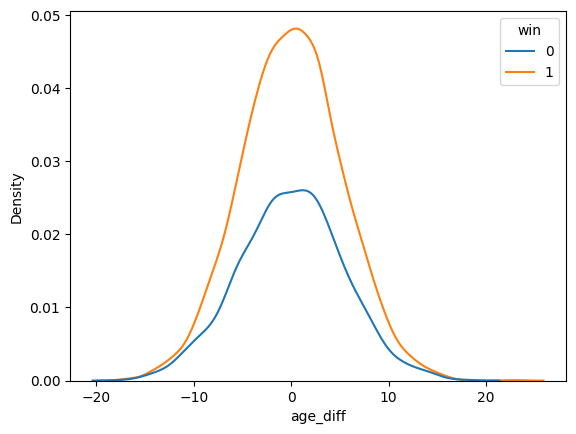

In [7]:
from scipy.stats import gaussian_kde

age_diff = c1[['win', 'age_diff']]
age_diff

sns.kdeplot(data=age_diff, x="age_diff", hue="win")

# Calculate the point density
# xy = np.vstack([c.age_diff, c.win_rate])
# z = gaussian_kde(xy)(xy)


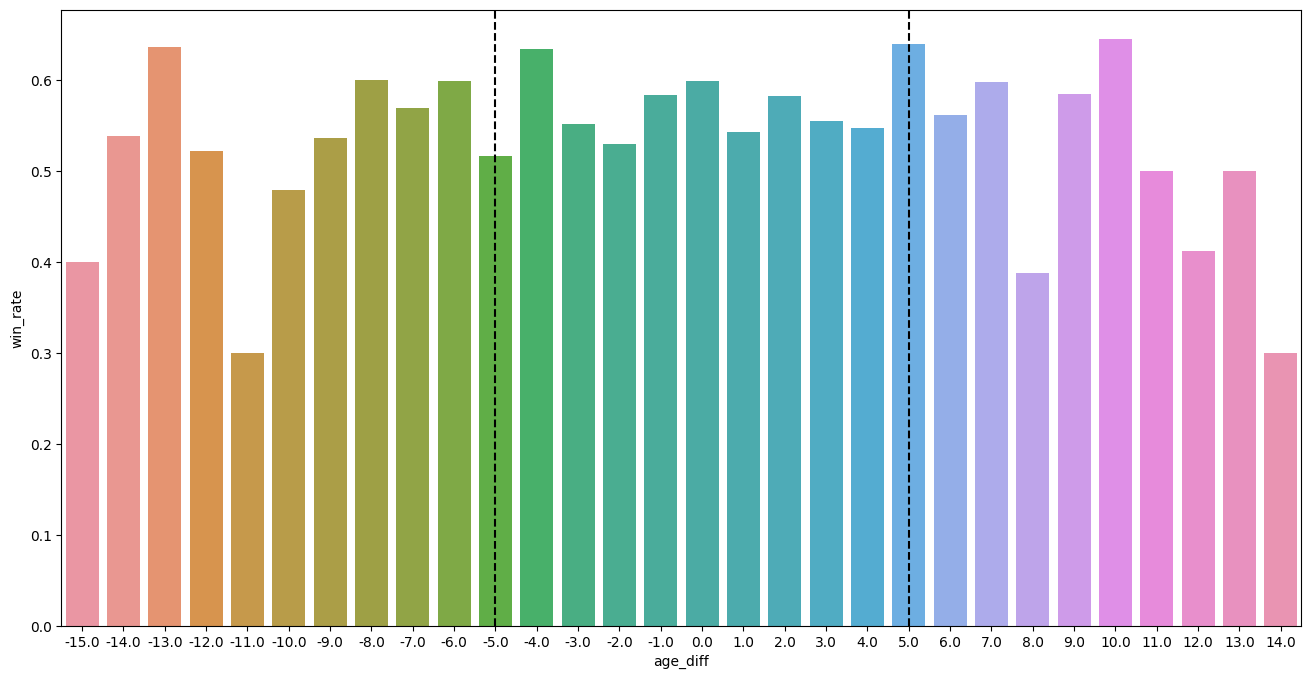

In [8]:
age_diff_df = diffs[['age_diff', 'win']]

age_ct = pd.crosstab(index = diffs['age_diff'], columns = diffs['win'])

age_ct['win_rate'] = age_ct[1] / (age_ct[1] + age_ct[0])
age_ct['total_matches'] = (age_ct[1] + age_ct[0]) # Wins plus losses
age_ct = age_ct.loc[age_ct.total_matches >= 5].reset_index()

plt.figure(figsize = (16,8))

sns.barplot(data = age_ct,
            x = age_ct.age_diff.sort_values(),
            y = age_ct.win_rate)

plt.axvline(x=10, color='black', linestyle='--')
plt.axvline(x=20, color='black', linestyle='--')

plt.show()

# sns.barplot(data = diffs[('age_diff', 'win')])

In [9]:
p_25 = age_diff_df.loc[age_diff_df.age_diff <= int(np.percentile(age_diff_df.age_diff, q=[25]))]
print('25th Percentile Win Rate: ', p_25.win.mean().round(3))
p_25

p_75 = age_diff_df.loc[age_diff_df.age_diff >= int(np.percentile(age_diff_df.age_diff, q=[75]))]
p_75
print('75th Percentile Win Rate: ', p_75.win.mean().round(3))

p_10 = age_diff_df.loc[age_diff_df.age_diff <= int(np.percentile(age_diff_df.age_diff, q=[10]))]
print('10th Percentile Win Rate: ', p_10.win.mean().round(3))
p_10

p_90 = age_diff_df.loc[age_diff_df.age_diff >= int(np.percentile(age_diff_df.age_diff, q=[90]))]
print('90th Percentile Win Rate: ', p_90.win.mean().round(3))

25th Percentile Win Rate:  0.563
75th Percentile Win Rate:  0.557
10th Percentile Win Rate:  0.536
90th Percentile Win Rate:  0.521


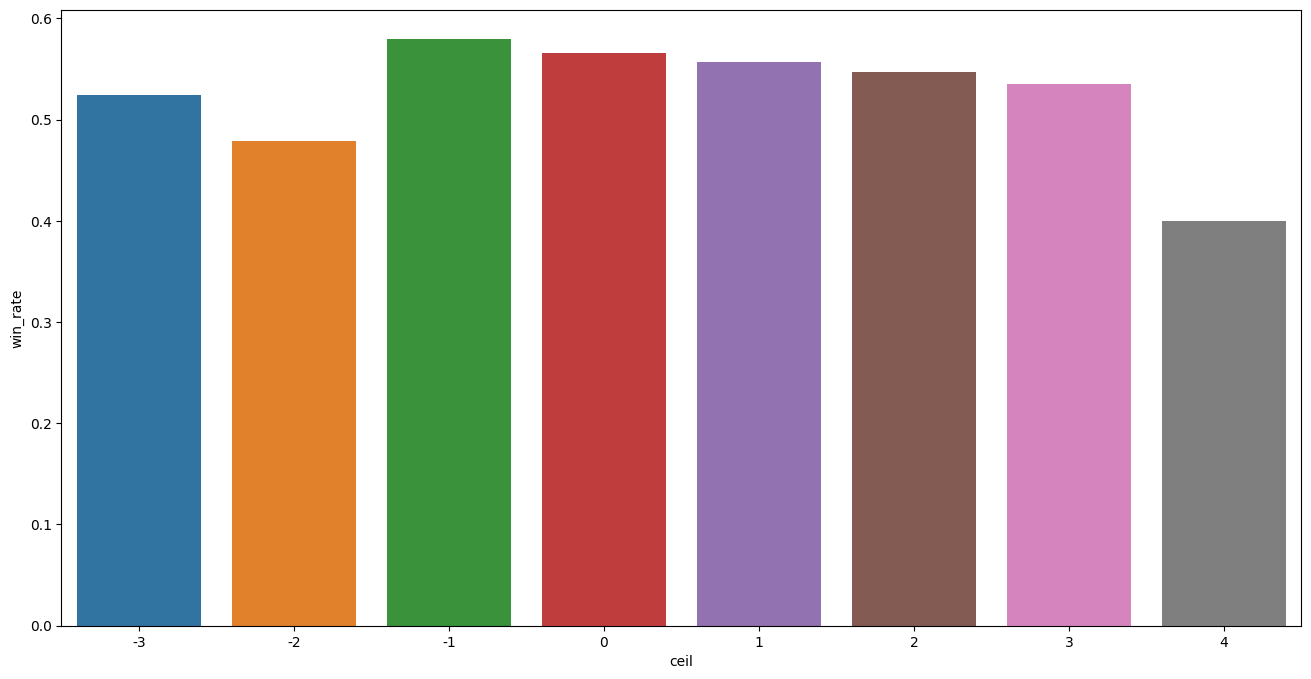

In [33]:
import math

age_ct['ceil'] = (age_ct['age_diff']/4).apply(math.ceil)

grouped = age_ct.groupby('ceil').mean('win_rate').reset_index()

plt.figure(figsize = (16,8))

# plt.xlim(grouped.ceil.min(), grouped.ceil.max())

sns.barplot(data = grouped,
            x = age_ct.ceil.sort_values(),
            y = age_ct.win_rate,
            errorbar=None)

# plt.axvline(x=4, color='black', linestyle='--')
# plt.axvline(x=10, color='black', linestyle='--')

plt.show()

In [35]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(c['age_diff'], c['win'])


# Perform a chi-square test on the contingency table
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the chi-square statistic, p-value, and degrees of freedom
print("chi-square statistic: {:.2f}".format(chi2_stat))
print("p-value: {:.4f}".format(p_value))
print("degrees of freedom: {}".format(dof))


chi-square statistic: 28.06
p-value: 0.8250
degrees of freedom: 36
